### Clase 2 -  Implementación de Mini-Batch y First Order Momentum sin librerías

In [29]:
import random
import math
import matplotlib.pyplot as plt

### Genero dataset

In [251]:
# Genero valores de x entre -1 y 8, con step = 0.1
x = list(map(lambda value: value/1000.0, range(-1000, 8000, 1)))
y_true = []

# Genero valores de y utilizando la función de la consigna
for i in range(len(x)):
    y = -(x[i]-3)**2 + 2 + (0.1 * math.sin(10*x[i]))
    y_true.append(y)

len(x), min(x), max(x)


(9000, -1.0, 7.999)

### Grafico dataset

Text(0, 0.5, 'y')

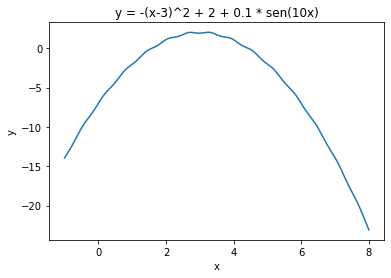

In [252]:
#Grafico datos
plt.figure()
plt.plot(x,y_true)
plt.title('y = -(x-3)^2 + 2 + 0.1 * sen(10x)')
plt.xlabel('x')
plt.ylabel('y')


### Mini-batch

In [266]:
#Hiperparametros: n_epochs, batch_size, n_batches, alpha


def mini_batch(X,y, n_batches, n_epochs, alpha):
    batch_size = int(len(X)/n_batches)
    n_epochs = n_epochs
    alpha = alpha
    # Paso 1 - Inicializar w y b con distribución U(-1,1)
    w1 = random.uniform(-1,1) 
    w2 = random.uniform(-1,1)
    b = random.uniform(-1,1)
    #Inicializo gradientes en cero
    dw1 = 0
    dw2 = 0
    db = 0
    err = []
    err_2 = 0

    
    MSE=[] # Acá voy ir guardando los MSE para cada Epoch

    for epoch in range(n_epochs): # Iteracion por cada epoch
        err = []
        err_2 = 0
        y_hat = []
        for b in range(n_batches): # Iteracion por cada mini-batch

            for i in range(batch_size): # Recorro las muestas adentro del mini-batch
            
            # Step1: Forward Propagation
                y_hat.append(w1 * X[i]**2 + w2 * X[i] + b)
            
            # Step2: Error
                err.append(y[i] - y_hat[i])
                err_2 += (err[i])**2

            #Step 3: Backpropagation
            dw1 = -2 * err[b] * X[b]**2
            dw2 = -2 * err[b] * X[b]
            db = -2 * err[b]

            #Step4: Actualización de los pesos
            w1 -= alpha * dw1
            w2 -= alpha * dw2
            b -= alpha * db
           
        MSE.append(err_2/n_batches) # Luego graficar MSE vs Epochs
    return MSE

In [285]:
#Pruebo con n_epochs=100 y alpha=0.01)
MSE = mini_batch(x,y_true, 90, n_epochs=100, alpha=0.001)

Text(0, 0.5, 'MSE')

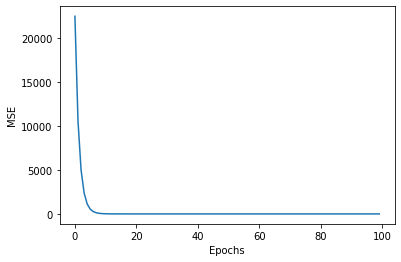

In [286]:
# Grafico MSE en función de las Epochs
plt.plot(MSE)
plt.xlabel("Epochs")
plt.ylabel("MSE")

### First Order Momentum

In [287]:
#Hiperparametros: n_epochs, epsilon, n_batches, alpha

def first_order_momentum(X,y, n_batches, epsilon, n_epochs, alpha):
    batch_size = int(len(X)/n_batches)
    n_epochs = n_epochs
    alpha = alpha
    epsilon = epsilon
    v1 = 0
    v2 = 0
    vb = 0
    dw1 = 0
    dw2 = 0
    db = 0
    err = []
    err_2 = 0
    y_hat = []
    # Paso 1 - Inicializar w y b con distribución U(-1,1)
    w1 = random.uniform(-1,1) 
    w2 = random.uniform(-1,1)
    b = random.uniform(-1,1)
    
    MSE=[] # Acá voy ir guardando los MSE para cada Epoch

    for epoch in range(n_epochs): # Iteracion por cada epoch
        err = []
        err_2 = 0
        y_hat = []
        for b in range(n_batches): # Iteracion por cada mini-batch

            for i in range(batch_size): # Recorro las muestras adentro del mini-batch
                
            # Step1: Forward Propagation
                y_hat.append(w1 * X[i]**2 + w2 * X[i] + b)
            
            # Step2: Error
                err.append(y[i] - y_hat[i])
                err_2 += (err[i])**2

            #Step 3: Backpropagation
            dw1 = -2 * err[b] * X[b]**2
            dw2 = -2 * err[b] * X[b]
            db = -2 * err[b]

            #Calculo V
            v1 = epsilon * v1 + alpha * dw1
            v2 = epsilon * v2 + alpha * dw2
            vb = epsilon * vb + alpha * db
            
            #Step4: Actualización de los pesos
            w1 -= v1
            w2 -= v2
            b -= vb

           
        MSE.append(err_2/n_batches) # Luego graficar MSE vs Epochs
    return MSE

In [288]:
MSE_fom = first_order_momentum(x,y_true, 90, epsilon = 0.5, n_epochs = 1000, alpha=0.001)

Text(0, 0.5, 'MSE - First Order Momentum')

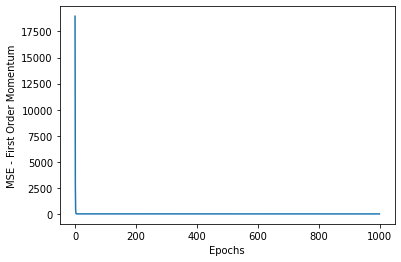

In [289]:
# Grafico MSE en función de las Epochs
plt.plot(MSE_fom)
plt.xlabel("Epochs")
plt.ylabel("MSE - First Order Momentum")